# Data Analysis: 2017-2018 Washington Wizards
March 7, 2018

* The objective of this analysis is to quantitatively compare the performance of the Washington Wizards this season with, and without their star player John Wall.

* All data for this project comes from Basketball Reference: https://www.basketball-reference.com/

In [1]:
# Data analysis packages
import pandas as pd

# Package for data visualization
import matplotlib.pyplot as plt

In [2]:
# The raw data set has more columns than we need, let's narrow down the data to import
col_set1 = ['G','Date','Home/Away','Opponent','WizResult','Result','WizPts','OppPts','JW_Active']

In [3]:
season_to_date = pd.read_csv('season_data_030718.csv', sep=',',index_col=0,
                             usecols = col_set1)

# Remove all rows with null values representing games that have not yet been played this season.
season_to_date = season_to_date.dropna()

In [4]:
season_to_date.head()

,Date,Home/Away,Opponent,WizResult,Result,WizPts,OppPts,JW_Active
G,,,,,,,,
1.0,Wed Oct 18 2017,H,Philadelphia 76ers,W,1.0,120.0,115.0,Y
2.0,Fri Oct 20 2017,H,Detroit Pistons,W,1.0,115.0,111.0,Y
3.0,Mon Oct 23 2017,A,Denver Nuggets,W,1.0,109.0,104.0,Y
4.0,Wed Oct 25 2017,A,Los Angeles Lakers,L,0.0,99.0,102.0,Y
5.0,Fri Oct 27 2017,A,Golden State Warriors,L,0.0,117.0,120.0,Y


- Each row contains data for a particular game of the season.
- The index column **G** indicates how far into the regular season each game is. This can hold values between 1 and 82.
- Data in **Result** are wins and losses coded as either 1 for a win, or 0 for a loss. For any subset of the season, the mean of this column gives us the Win % for that subset.
- The **JW_Active** column indicates games in which John Wall was on the active roster. (i.e. games played)

In [5]:
# For example, let's see the info about the 34th game of the season
season_to_date.loc[34]

Date         Mon Dec 25 2017
Home/Away                  A
Opponent      Boston Celtics
WizResult                  W
Result                     1
WizPts                   111
OppPts                   103
JW_Active                  Y
Name: 34.0, dtype: object

That was a good win over the Celtics on Christmas! Now let's dig into the data.

## 1. Season Summary

In [6]:
# Total number of games played
print('Games: ', season_to_date['Result'].count())

# Average of numerical values for season so far, rounded to 3 significant digits.
print(round(season_to_date.mean(), 3))

# Season win % variable
WinPct_season = round(season_to_date['Result'].mean(), 3)

Games:  65
Result      0.569
WizPts    107.108
OppPts    105.538
dtype: float64


In [7]:
# Points Per Game (PPG) differential
PPG_dif_season = round(season_to_date['WizPts'].mean() - season_to_date['OppPts'].mean(), 1)
PPG_dif_season

1.6

For the whole season so far, the Wizards have a win % of **0.569** and have outscored their opponents by approximately **1.6** points per game.

## 2. Record with John Wall

In [8]:
WithWall = season_to_date[season_to_date["JW_Active"]=="Y"]

print('Games: ', WithWall['Result'].count())
print(round(WithWall.mean(), 3))

# Store win % as a variable to use later
WinPct_JW = round(WithWall['Result'].mean(), 3)

Games:  37
Result      0.568
WizPts    108.324
OppPts    106.568
dtype: float64


In [9]:
# PPG differential
PPG_dif_JW = round(WithWall['WizPts'].mean() - WithWall['OppPts'].mean(), 1)
PPG_dif_JW

1.8

In the 37 games Wall has played this season, the team has a win % of **0.568**, and have a **+1.8** points per game differenial.

## 3. Wizards better without Wall?

John Wall has missed other games earlier in the season, but his longest absence of the season started January 27, 2018.
The team's winning record since this date has led some to debate whether the Wizards are actually better off without him.

In [10]:
# Partition the season data into 2 subsets before and after Jan 27, 2018
BeforeJan27 = season_to_date.loc[:48]
SinceJan27 = season_to_date.loc[49:]

In [11]:
SinceJan27.head()

,Date,Home/Away,Opponent,WizResult,Result,WizPts,OppPts,JW_Active
G,,,,,,,,
49.0,Sat Jan 27 2018,A,Atlanta Hawks,W,1.0,129.0,104.0,N
50.0,Tue Jan 30 2018,H,Oklahoma City Thunder,W,1.0,102.0,96.0,N
51.0,Thu Feb 1 2018,H,Toronto Raptors,W,1.0,122.0,119.0,N
52.0,Sat Feb 3 2018,A,Orlando Magic,W,1.0,115.0,98.0,N
53.0,Mon Feb 5 2018,A,Indiana Pacers,W,1.0,111.0,102.0,N


The most recent period without Wall began with a 5-game win streak.

In [12]:
# Win %
print('Games: ', SinceJan27['Result'].count())
# Wiz PPG and Opponent PPG
print(round(SinceJan27.mean(), 3))

Games:  17
Result      0.647
WizPts    108.412
OppPts    105.412
dtype: float64


In [13]:
# PPG differential
PPG_dif_SinceJan27 = round(SinceJan27['WizPts'].mean() - SinceJan27['OppPts'].mean(), 1)
PPG_dif_SinceJan27

3.0

Since January 27, the Wizards have a winning % of **0.647** and on average have outscored their opponents by approximately **3 points per game**.

In [14]:
# Is win % since Jan 27 better than win % with Wall?
SinceJan27['Result'].mean() > WithWall['Result'].mean()

True

## 4. Before and After
Wall has missed games earlier in the season, but the notion that the team could actually be better *without him* did not occur until recently. Let's compare the most recent games without him vs the games he missed earlier in the season.

In [15]:
# Games played without Wall earlier in the season.
NoWallBeforeJan27 = BeforeJan27[BeforeJan27['JW_Active']=='N']

In [16]:
# Number of games w/o John Wall before January 27
print('Games: ', NoWallBeforeJan27['Result'].count())
# Win % and PPG stats
print(round(NoWallBeforeJan27.mean(), 3))

Games:  11
Result      0.455
WizPts    101.000
OppPts    102.273
dtype: float64


In [17]:
# PPG differential in games w/o Wall before Jan27
PPG_dif_preJan27 = round(NoWallBeforeJan27['WizPts'].mean() - NoWallBeforeJan27['OppPts'].mean(), 1)
PPG_dif_preJan27

-1.3

In the games John Wall missed earlier this season, the Wizards posted a winning % of **0.455** and were outcored by **1.3 points per game**.

Let's graph some of these findings.

In [18]:
# X axis labels to be used for multiple charts
x_names = ['With Wall','W/O Before Jan 27', 'W/O After Jan 27']

# Variable to store bar heights
y_vals = [WithWall['Result'].mean(), NoWallBeforeJan27['Result'].mean(), SinceJan27['Result'].mean()]

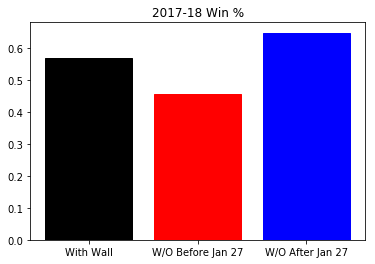

In [19]:
fig1 = plt.figure()
bars1 = plt.bar([1,2,3],y_vals, align='center')
bars1[0].set_color('k')
bars1[1].set_color('r')
bars1[2].set_color('b')
plt.xticks([1,2,3], x_names)
plt.title('2017-18 Win %')
plt.show()

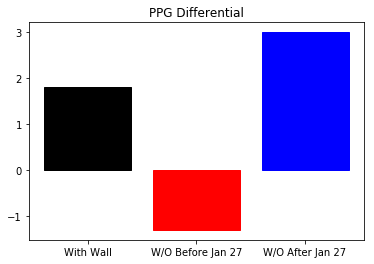

In [20]:
fig2 = plt.figure()
bars2 = plt.bar([1,2,3], [PPG_dif_JW, PPG_dif_preJan27, PPG_dif_SinceJan27], align='center')
bars2[0].set_color('k')
bars2[1].set_color('r')
bars2[2].set_color('b')
plt.xticks([1,2,3], x_names)
plt.title('PPG Differential')
plt.show()

## 5. Larger sample size

* The Wizards *seem* to be better without John Wall in the most recent stretch of games.
* Why is this the case?
    * Is it because we have a **larger sample size** of games to evaluate?
    * Could the team **playing differently** in his absence ** *now* ** than it did earlier?

In [21]:
NoWall = season_to_date[season_to_date["JW_Active"]=="N"]

In [22]:
print('Games: ', NoWall['Result'].count())
print(round(NoWall.mean(), 3))

# store win % as a variable
WinPct_NoJW_season = round(NoWall['Result'].mean(), 3)

Games:  28
Result      0.571
WizPts    105.500
OppPts    104.179
dtype: float64


In [23]:
PPG_dif_NoJW_season = round(NoWall['WizPts'].mean() - NoWall['OppPts'].mean(), 1)
PPG_dif_NoJW_season

1.3

In 28 total games without Wall this season. The team was a win % of **0.571** and a PPG differential of **+1.3**.

Let's compare win % for the whole season against all games with John Wall, and all games without him.

In [24]:
print('Season Win %: ', WinPct_season)
print('Win % w/ Wall: ', WinPct_JW)
print('Win % w/0 Wall: ', WinPct_NoJW_season)

Season Win %:  0.569
Win % w/ Wall:  0.568
Win % w/0 Wall:  0.571


Interesting, over the whole season, the Win % is about the same with and without John Wall.
* The team had a losing record in the games John Wall missed before Jan 27.
* They now have a winning record in *all* games without him this season due to the recent stretch of games bringing up this average. 
* Why does the team *now* have a winning record without John Wall in the lineup? 

## 6. Team Stats
What is the team doing differently that may explain their improved win percentage?

In [25]:
# Import basic team statistics
TeamBasic_without_JW = pd.read_csv('a_BasicTeamStats_without_030718.csv', sep=',', index_col=0)
TeamBasic_with_JW = pd.read_csv('a_BasicTeamStats_With_030718.csv', sep=',', index_col=0)

# Basic team stats for games w/o Wall
BasicStats_no_Wall_early = TeamBasic_without_JW.loc[:48]
BasicStats_no_Wall_afterJan27 = TeamBasic_without_JW.loc[49:]

# Player basic stats per game
player_per_game = pd.read_csv('PlayerPerGame.csv', sep=',', index_col=0)
player_per_gm_adv = pd.read_csv('PlayerPerGameAdvanced.csv', sep=',', index_col=0)

Let's compare some basic team stats in the games since January 27 against those same stats in the games with John Wall. The difference between these stats is a good place to start.
>**(Team stats w/o Wall since Jan 27) - (Team stats w/ Wall this season)**

In [26]:
# Difference in basic team stats per game
Recent_vs_WithJW = BasicStats_no_Wall_afterJan27.mean() - TeamBasic_with_JW.mean()
Recent_vs_WithJW

FG     0.901431
FGA   -0.060413
FG%    0.011558
3P    -0.017488
3PA   -0.329094
3P%    0.007075
FT    -1.697933
FTA   -4.562798
FT%    0.099963
ORB    0.370429
DRB   -0.753577
TRB   -0.383148
AST    5.030207
STL    0.591415
BLK   -0.729730
TOV   -0.224165
PF     0.449921
PTS    0.087440
dtype: float64

Which stats stand out?

In [27]:
# It appears that Free Throw Attempts has the largest decrease
Recent_vs_WithJW.min() == Recent_vs_WithJW['FTA']

True

In [28]:
# Assists per game appears to have the largest increase
Recent_vs_WithJW.max() == Recent_vs_WithJW['AST']

True

While the team has fewer Free Throw Attempts, the PPG has increased. So this drop does not seem to negatively impact the team's scoring so far. The decline in FTA makes sense because John Wall leads the team in FTA.

In [29]:
# FTA/gm Team Leaders
player_per_game[['Player Name', 'FTA']].sort_values('FTA', ascending=False).head()

,Player Name,FTA
Rk,,
1,John Wall,6.0
2,Bradley Beal,4.7
3,Ramon Sessions,4.0
4,Kelly Oubre,2.7
5,Marcin Gortat,2.0


## 7. "Everybody eats."

Next, let's look at assists in games with Wall, early season games without Wall, and recent games without him.

In [30]:
# Assign AST/gm (APG) variables

# Team assists per game with John Wall this season
APG_w_JW = round(TeamBasic_with_JW['AST'].mean(), 1)

# Team assists per game in games w/o Wall earlier (before Jan 27)
APG_wo_JW_early = round(BasicStats_no_Wall_early['AST'].mean(), 1)

# Team assists per game without Wall in recent games (after Jan 27)
APG_wo_JW_recent = round(BasicStats_no_Wall_afterJan27['AST'].mean(), 1)

In [31]:
# How does AST/gm differ between recent and early season games w/o John Wall?
round(APG_wo_JW_recent - APG_wo_JW_early, 1)

7.2

In [32]:
# Recent vs games with Wall
round(APG_wo_JW_recent - APG_w_JW)

5

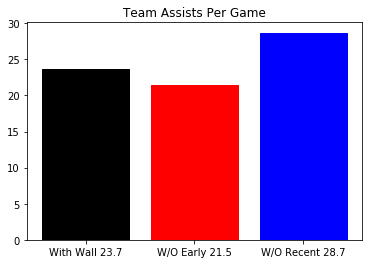

In [33]:
# labels for x-axis
x_names2 = ['With Wall ' + str(APG_w_JW),
            'W/O Early '+ str(APG_wo_JW_early),
            'W/O Recent '+ str(APG_wo_JW_recent)]

fig3 = plt.figure()
bars3 = plt.bar([1,2,3], [APG_w_JW, APG_wo_JW_early, APG_wo_JW_recent], align='center')
bars3[0].set_color('k')
bars3[1].set_color('r')
bars3[2].set_color('b')
plt.xticks([1,2,3], x_names2)
plt.title('Team Assists Per Game')
plt.show()

We can clearly see that the team is moving the ball more now than during any other period of this season.

Let's take a look at how Wall impacted assists in the games he played in this season.

In [34]:
print('Wizards Assist Per Game Leaders')
print(player_per_game[['Player Name', 'AST']].sort_values('AST', ascending=False).head())

Wizards Assist Per Game Leaders
         Player Name  AST
Rk                       
1          John Wall  9.3
2       Bradley Beal  4.6
10  Tomas Satoransky  3.5
14       Tim Frazier  3.5
6        Otto Porter  2.1


We can see that John Wall leads the team in assists per game, but that value does not tell enough about the impact of his assists. Next, we will check out his Assist Percentage, that is the percentage of his teammates' made field goals that his assists account for.

In [35]:
player_per_gm_adv[['Player Name', 'AST%']].sort_values('AST%', ascending=False).head()

,Player Name,AST%
Rk,,
6,John Wall,43.0
11,Tim Frazier,31.3
7,Tomas Satoransky,24.7
1,Bradley Beal,21.2
4,Marcin Gortat,10.3


John Wall leads the team in Assist Percentage at 43%.

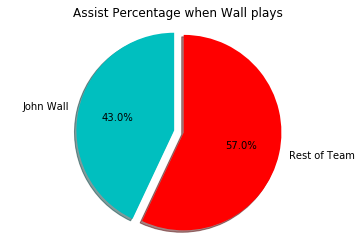

In [36]:
# Pie chart
names = ['John Wall', 'Rest of Team']
sizes = [43, 57]
explode = (0.1, 0)

fig4, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=names,
        colors =['c','r'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax1.set(title='Assist Percentage when Wall plays')

plt.show()

In Wall's most recent absence (since Jan 27), the team's assists per game has increased to compensate for the lack of Wall's passing ability.

* So far, by comparing the record of games with Wall and all games without him for the whole season, we do not see much difference in the team's win %.
* We observed that Free Throw Attempts per game have gone down the most in Wall's absence in the most recent stretch of games, but this drop does not seem to be negatively impacting the team's overall scoring ability.
* Assists per game since January 27 is the highest it has been all season despite the team playing without their leading passer.  Based on what we have seen so far, this increase looks like a possible cause of the team's recent success.
* However, we need to question if this increased passing is consistent, or if a few games with an extreme number of assists have distorted the average assists number.

## 8. Consistency

Let's evaluate the standard deviation of assists to evaluate how consistently the team has performed in this regard. The higher the standard deviation is, the more the number of assists varies from game to game.

In [37]:
# More concise variable
AST_recent = BasicStats_no_Wall_afterJan27['AST']

In [38]:
# Summary statistics for AST in games since Jan 27
AST_recent.describe()

count    17.000000
mean     28.705882
std       4.870379
min      21.000000
25%      25.000000
50%      29.000000
75%      31.000000
max      40.000000
Name: AST, dtype: float64

Here's what these numbers refer to:
* std = standard deviation
* 25 % = Q1 (25% of data is below this value)
* 50 % = median (50% of data is below this value)
* 75 % = Q3 (25% of data is above this value)

In [39]:
# Assign these values to variables for further analysis
mean_ = AST_recent.mean()
min_ = AST_recent.min()
Q1 = AST_recent.quantile(q=0.25)
med = AST_recent.median()
Q3 = AST_recent.quantile(q=0.75)
max_ = AST_recent.max()

Let's compare the mean and the median. Outliers can affect the mean, so median is a better measure of the midpoint when the data set is skewed.

In [40]:
# Absolute value of the difference between the mean and median
abs(round(mean_ - med, 1))

0.3

The mean is pretty close to the median, so the AST/gm (since Jan 27) does not seem to be skewed by extreme values. Let's check for outliers anyway, just in case.

We'll use the Fence Rule to check for outliers. The idea is as follows:

* The Interquartile Range (IQR) represents the middle 50% of the data
>**IQR = Q3 - Q1**

* Outliers are any values that fall either below the Lower Fence,
>**LF = Q1 - (1.5 * IQR)**

* Or, above the Upper Fence
>**UF = Q3 + (1.5 * IQR)**

In [41]:
# Fence calculations
IQR = Q3 - Q1
LF = Q1 - (1.5*IQR)
UF = Q3 + (1.5 * IQR)

Now that we have the LF and UF we can finally check for outliers.

In [42]:
# Check for outliers below Lower Fence
AST_recent < LF

G
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
Name: AST, dtype: bool

No outliers below the Lower Fence.

In [43]:
# Check for outliers above Upper Fence
AST_recent > UF

G
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
Name: AST, dtype: bool

No outliers above the Upper Fence either!

## 9. Final Thoughts

* We have seen that Win % alone does not explain much. 
* Instead of relying on the primary ball-handler to generate most of their offense, the assists are now more spread out. 
* To date, they have played 37 games with him this season which is 20 more than the amount in the most recent stretch (17 games since January 27). 
* It is inconclusive if the team is clearly better without John Wall this season.
* It is more likely that in recent games, the team has adopted a strategy better suited to the skillset of the available players.